# Banknote Classification Dataset:

- The first step is to define and explore the dataset.

- We will be working with the “Banknote” standard binary classification dataset.

- The banknote dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

- The dataset contains 1,372 rows with 5 numeric variables. It is a classification problem with two classes (binary classification).
the Data was found in Kaggle:https://www.kaggle.com/datasets/aariyan101/bank-notes

## Below provides a list of the five variables in the dataset:

- variance of Wavelet Transformed image (continuous).
- skewness of Wavelet Transformed image (continuous).
- kurtosis of Wavelet Transformed image (continuous).
- entropy of image (continuous).
- class (integer).

## Steps Involved:
- Getting familier with dataset
- Data Preprocessing
- EDA
- Data Preparation
- Model Creation/Evaluation

In [47]:
#importing libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

#  Getting Familier with dataset

In [48]:
df=pd.read_csv('bank_note_data.csv')
df

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [50]:
df.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Checking for missing values

In [51]:
df.isnull().sum()

Image.Var     0
Image.Skew    0
Image.Curt    0
Entropy       0
Class         0
dtype: int64

# EDA

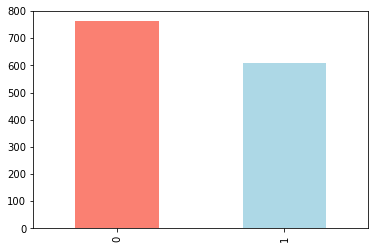

In [52]:
# Checking distribution of target classes
df["Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [53]:
df.corr()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
Image.Var,1.000000,0.264026,-0.380850,0.276817,-0.724843
Image.Skew,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Image.Curt,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


<AxesSubplot:>

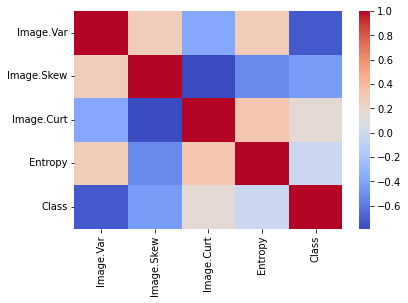

In [54]:
sns.heatmap(df.corr(),cmap='coolwarm')

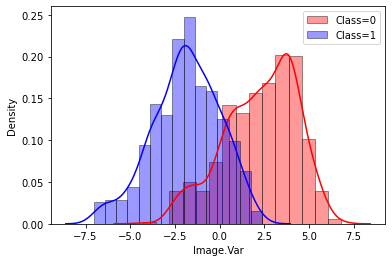

In [55]:
sns.distplot(df[df['Class']==0]['Image.Var'],bins=15,hist_kws=dict(edgecolor='black'),color='red',label='Class=0')
sns.distplot(df[df['Class']==1]['Image.Var'],bins=15,hist_kws=dict(edgecolor='black'),color='blue',label='Class=1')
plt.legend()

<AxesSubplot:xlabel='Image.Curt', ylabel='Image.Skew'>

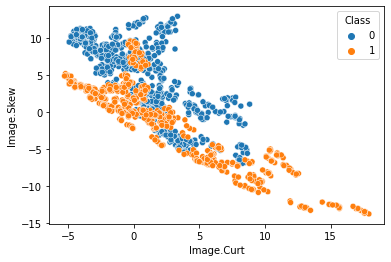

In [56]:
sns.scatterplot(x='Image.Curt',y='Image.Skew',data=df,hue='Class')

# Data Preparation

In [57]:
# independent variables
x = df.drop('Class',axis=1)
#dependent variables
y = df.Class

In [58]:
# independent variables
x 

,Image.Var,Image.Skew,Image.Curt,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [59]:
#dependent variables
y 

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

## Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

## Scaling the Data
When we create the artificial neural network, then we have to scale the data into smaller numbers because the deep learning algorithm multiplies the weights and input data of the nodes and it takes lots of time, So for reducing that time we scale the data.

We will scalling the data with StandardScaler

In [61]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler
#creating object
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [62]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

#  Model Creation/Evaluation

## Here we creating single hidden layer neural network:
A hidden layer in an artificial neural network 
is a layer in between input layers and output layers, 
where artificial neurons take in a set of weighted inputs
and produce an output through an activation function.

Epoch 1/100
35/35 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5861 - val_loss: 0.0000e+00 - val_accuracy: 0.7564
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7584 - val_loss: 0.0000e+00 - val_accuracy: 0.7855
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8177 - val_loss: 0.0000e+00 - val_accuracy: 0.8109
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8733 - val_loss: 0.0000e+00 - val_accuracy: 0.8400
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8824 - val_loss: 0.0000e+00 - val_accuracy: 0.8655
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8952 - val_loss: 0.0000e+00 - val_accuracy: 0.8727
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9189 - v

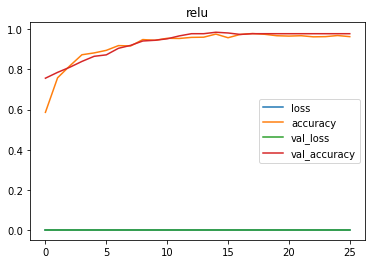

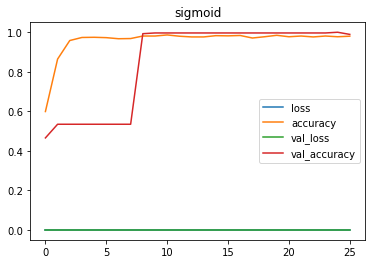

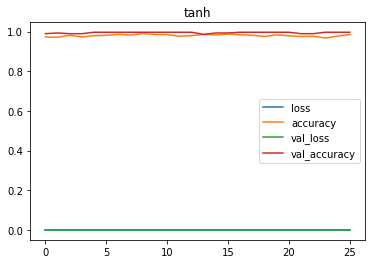

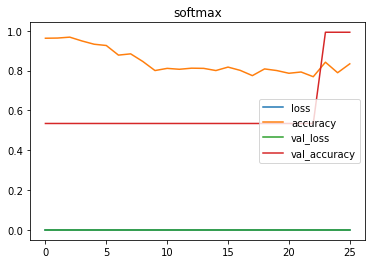

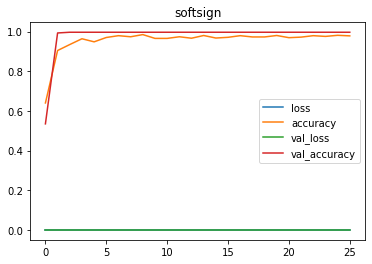

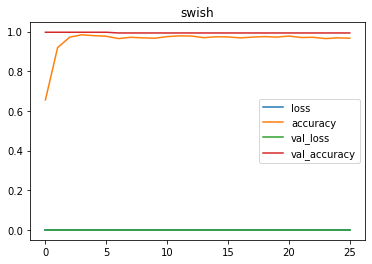

In [63]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()
result = []
accuracy_report = []
act_fun = {'relu':'relu','sigmoid':'sigmoid','tanh':'tanh','softmax':'softmax','softsign':'softsign','swish':'swish'}
for i,j in act_fun.items():
    ann.add(Dense(units = 30,activation = j))
    ann.add(BatchNormalization())
    ann.add(Dropout(0.5))
    ann.add(Dense(units = 1,activation = 'sigmoid'))
    #COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
    ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    #setting callbacks for monitoring maximum accuracy
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
    #TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
    model=ann.fit(x_train, y_train,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])
    
    
    #accuracy plot
    losses = pd.DataFrame(ann.history.history)
    losses.plot()
    plt.title(i)
    
    
    #testing Test data
    y_pred = ann.predict(xtest)
    
    #converting values
    y_pred = (y_pred>0.5)
    cm = confusion_matrix(ytest,y_pred)
    score = accuracy_score(ytest,y_pred)
    print(cm)
    #classification_report
    print('---'*20)
    print("Classification Report Of", i )
    print('---'*20)
    print(classification_report(ytest,y_pred))

    print('---'*20)
    print('---'*20)
    result.append((i,[score]))
    print('---'*20)
    print('---'*20)

In [64]:
result

[('relu', [0.9781818181818182]),
 ('sigmoid', [0.9890909090909091]),
 ('tanh', [0.9963636363636363]),
 ('softmax', [0.9927272727272727]),
 ('softsign', [0.9963636363636363]),
 ('swish', [0.9927272727272727])]